In [1]:
import re
import platform

if re.search("Intel", platform.processor()):
    from sklearnex import patch_sklearn

    print("Intel CPU DETECTED!")
    patch_sklearn()
import pandas as pd

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

%matplotlib inline

# Data Preprocessing

In [2]:
data = pd.read_csv('./Traffic_accidents.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4265 entries, 0 to 4264
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   OBJECTID              4265 non-null   int64 
 1   DATE_                 4265 non-null   object
 2   TIME                  4265 non-null   int64 
 3   SEVERITY              4265 non-null   int64 
 4   SEVERITY_DESCRIPTION  4265 non-null   object
 5   ACCIDENT_TYPE         4265 non-null   object
 6   ACCIDENT_DESCRIPTION  4265 non-null   object
 7   VEHICLES              4265 non-null   int64 
 8   CASUALTIES            4265 non-null   int64 
 9   PEDESTRIAN            4265 non-null   int64 
 10  CYCLES                4265 non-null   int64 
 11  MCYCLES               4265 non-null   int64 
 12  CHILDREN              4265 non-null   int64 
 13  OAPS                  4265 non-null   int64 
 14  X                     4265 non-null   int64 
 15  Y                     4265 non-null   

In [3]:
data.head(3)

,OBJECTID,DATE_,TIME,SEVERITY,SEVERITY_DESCRIPTION,ACCIDENT_TYPE,ACCIDENT_DESCRIPTION,VEHICLES,CASUALTIES,PEDESTRIAN,CYCLES,MCYCLES,CHILDREN,OAPS,X,Y,RENDER
0,1,2017/02/02 00:00:00+00,720,3,Slight,LC,Loss of Control,2,2,0,1,1,0,0,360035,175918,CYC
1,2,2017/02/02 00:00:00+00,1803,3,Slight,J,Turning movement ¿ unidentified priority,2,1,0,1,0,0,0,359039,172053,CYC
2,3,2017/02/03 00:00:00+00,2021,3,Slight,J2,Turning Movement from minor road,2,1,0,1,0,0,0,362596,175377,CYC


In [4]:
data.isnull().sum()

OBJECTID                0
DATE_                   0
TIME                    0
SEVERITY                0
SEVERITY_DESCRIPTION    0
ACCIDENT_TYPE           0
ACCIDENT_DESCRIPTION    0
VEHICLES                0
CASUALTIES              0
PEDESTRIAN              0
CYCLES                  0
MCYCLES                 0
CHILDREN                0
OAPS                    0
X                       0
Y                       0
RENDER                  0
dtype: int64

<Axes: >

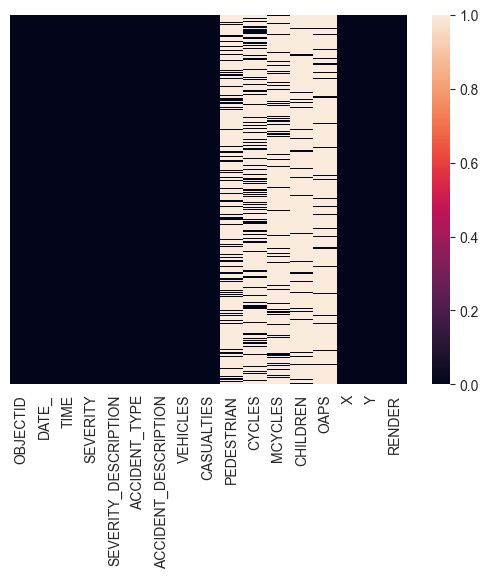

In [5]:
sns.heatmap(data == 0, yticklabels=False)

In [6]:
data.drop(['OBJECTID', 'DATE_', 'TIME', 'SEVERITY_DESCRIPTION', 'CASUALTIES', 'ACCIDENT_TYPE',
           'ACCIDENT_DESCRIPTION', 'X', 'Y', 'RENDER'], axis=1, inplace=True)
data.head(3)

,SEVERITY,VEHICLES,PEDESTRIAN,CYCLES,MCYCLES,CHILDREN,OAPS
0,3,2,0,1,1,0,0
1,3,2,0,1,0,0,0
2,3,2,0,1,0,0,0


# Performance Evaluation Functions

In [7]:
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "bs")
    plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$Age$", fontsize=15)
    plt.ylabel(r"$Glucose$", fontsize=15, rotation=90)

In [8]:
results = []


def add_results(result):
    results.append(result)


def get_results():
    print("Model, Test Avg. Accuracy, Test Avg. Precision")
    return results

In [9]:
def evaluate_model(model):
    y_pred = model.predict(X_test)
    matrix = multilabel_confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    accu_score = accuracy_score(y_test, y_pred)
    scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=10, n_jobs=-1)
    print("\nConfusion Matrix:")
    print(matrix)
    print("\nClassification Report:")
    print(class_report)
    print("\nAccuracy Score")
    print(accu_score)
    print("\n")
    print('\nAverage accuracy: ', np.mean(scores))

    # doing k fold cross validation for precision
    scores_test = cross_val_score(model, X_test, y_test, scoring='accuracy', cv=10, n_jobs=-1)

    print('\nTest average accuracy: ', np.mean(scores_test))

    scores = cross_val_score(model, X_train, y_train, scoring='precision_macro', cv=10, n_jobs=-1)
    # print the average score
    print('\nAverage precision: ', scores.mean())

    # doing k fold cross validation for accuracy
    scores_test = cross_val_score(model, X_test, y_test, scoring='precision_macro', cv=10, n_jobs=-1)

    print('\nTest average precision: ', scores_test.mean())

<h1> Splitting dataset </h1>

In [10]:
X = data.drop(['SEVERITY'], axis=1)
y = data['SEVERITY']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

<h1> Support Vector Machine </h1>

In [11]:
linear_svm_model = SVC(kernel='linear', class_weight='balanced')
linear_svm_pipeline = make_pipeline(StandardScaler(), linear_svm_model)

poly_svm_model = SVC(kernel='poly', class_weight='balanced')
poly_svm_pipeline = make_pipeline(StandardScaler(), poly_svm_model)

rbf_svm_model = SVC(kernel='rbf', class_weight='balanced')
rbf_svm_pipeline = make_pipeline(StandardScaler(), rbf_svm_model)


In [12]:
linear_svm_pipeline.fit(X_train, y_train)
poly_svm_pipeline.fit(X_train, y_train)
rbf_svm_pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(class_weight='balanced'))])

In [26]:
print("Linear Support Vector Machine:")
evaluate_model(model=linear_svm_pipeline)

Linear Support Vector Machine:

Confusion Matrix:
[[[1023  249]
  [   5    3]]

 [[ 980  188]
  [  77   35]]

 [[  71   49]
  [ 404  756]]]

Classification Report:
              precision    recall  f1-score   support

           1       0.01      0.38      0.02         8
           2       0.16      0.31      0.21       112
           3       0.94      0.65      0.77      1160

    accuracy                           0.62      1280
   macro avg       0.37      0.45      0.33      1280
weighted avg       0.86      0.62      0.72      1280


Accuracy Score
0.6203125



Average accuracy:  0.44853538641107943


C:\Users\William Forber\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(



Test average accuracy:  0.61484375

Average precision:  0.3488009063308851

Test average precision:  0.36476498778417193


C:\Users\William Forber\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(


In [15]:
print("Polynomial Support Vector Machine:")
evaluate_model(model=poly_svm_pipeline)

Polynomial Support Vector Machine:

Confusion Matrix:
[[[1090  182]
  [   3    5]]

 [[ 885  283]
  [  61   51]]

 [[  77   43]
  [ 444  716]]]

Classification Report:
              precision    recall  f1-score   support

           1       0.03      0.62      0.05         8
           2       0.15      0.46      0.23       112
           3       0.94      0.62      0.75      1160

    accuracy                           0.60      1280
   macro avg       0.37      0.57      0.34      1280
weighted avg       0.87      0.60      0.70      1280


Accuracy Score
0.603125



Average accuracy:  0.5815739265111894


C:\Users\William Forber\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(



Test average accuracy:  0.65

Average precision:  0.35184982540347415


C:\Users\William Forber\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(



Test average precision:  0.3653338067046413


In [16]:
print("Radial Basis Function Support Vector Machine:")
evaluate_model(model=rbf_svm_pipeline)

Radial Basis Function Support Vector Machine:

Confusion Matrix:
[[[1091  181]
  [   3    5]]

 [[ 874  294]
  [  57   55]]

 [[  82   38]
  [ 453  707]]]

Classification Report:
              precision    recall  f1-score   support

           1       0.03      0.62      0.05         8
           2       0.16      0.49      0.24       112
           3       0.95      0.61      0.74      1160

    accuracy                           0.60      1280
   macro avg       0.38      0.58      0.34      1280
weighted avg       0.87      0.60      0.69      1280


Accuracy Score
0.59921875



Average accuracy:  0.585261834751184


C:\Users\William Forber\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(



Test average accuracy:  0.64921875

Average precision:  0.35364413287302304


C:\Users\William Forber\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(



Test average precision:  0.366036353750522


<h1> Hyperparameter Tuning: </h1>

<h2> Linear Kernel Tuning: </h2>

<p> Narrowing Down on best C hyper parameter </p>

In [17]:
parameter_grid = {'C': [0.1, 1, 1, 10, 100]}
grid_search = GridSearchCV(estimator=linear_svm_model, param_grid=parameter_grid, scoring='accuracy', n_jobs=- 1)
grid_search.fit(X_train, y_train)
print("Best Parameters", grid_search.best_params_)

Best Parameters {'C': 1}


<p> Looking for best C hyper parameter </p>

In [27]:
parameter_grid = {'C': np.linspace(0.1, 10, 100, dtype=float)}
grid_search = GridSearchCV(estimator=linear_svm_model, param_grid=parameter_grid, scoring='accuracy', n_jobs=- 1)
grid_search.fit(X_train, y_train)
print("Best Parameters", grid_search.best_params_)

Best Parameters {'C': 0.4}


Best hyper parameters for linear kernel is 0.4 for the C hyper parameter

<h2> Polynomial kernel tuning: </h2>

In [26]:
parameter_grid = {'C': [0.1, 1, 1, 10, 100, 1000, 10000]}

grid_search = GridSearchCV(estimator=poly_svm_model, param_grid=parameter_grid, scoring='accuracy', cv=3, n_jobs=- 1)
grid_search.fit(X_train, y_train)
print("Best Parameters", grid_search.best_params_)

Best Parameters {'C': 1000}


In [25]:
poly_svm_model = SVC(kernel='poly', class_weight='balanced', C=1000)
parameter_grid = {'degree': [1, 2, 3, 4, 5]}
grid_search = GridSearchCV(estimator=poly_svm_model, param_grid=parameter_grid, scoring='accuracy', cv=3, n_jobs=- 1)
grid_search.fit(X_train, y_train)
print("Best Parameters", grid_search.best_params_)

Best Parameters {'degreee': 1}


In [23]:
poly_svm_model = SVC(kernel='poly', class_weight='balanced', C=1000, degree=3)
parameter_grid = {'gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_search = GridSearchCV(estimator=poly_svm_model, param_grid=parameter_grid, scoring='accuracy', cv=3, n_jobs=- 1)
grid_search.fit(X_train, y_train)
print("Best Parameters", grid_search.best_params_)

Best Parameters {'gamma': 1}


<p> The best hyper parameters found for the polynomial kernel are: 
C = 1000 ,
degree = 3 ,
gamma = 1
</p>

<h2> Radial Basis Function kernel tuning: </h2>

In [17]:
parameter_grid = {'C': [0.01, 0.1, 1, 1, 10, 100, 1000], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_search = GridSearchCV(estimator=rbf_svm_model, param_grid=parameter_grid, scoring='accuracy', cv=3, n_jobs=- 1)
grid_search.fit(X_train, y_train)
print("Best Parameters", grid_search.best_params_)

Best Parameters {'C': 1, 'gamma': 0.1}


In [19]:
parameter_grid = {'C': np.linspace(0.1, 10, num=100, dtype=float)}
grid_search = GridSearchCV(estimator=rbf_svm_model, param_grid=parameter_grid, scoring='accuracy', cv=3, n_jobs=- 1)
grid_search.fit(X_train, y_train)
print("Best Parameters", grid_search.best_params_)

Best Parameters {'C': 0.4}


In [20]:
parameter_grid = {'gamma': np.linspace(0.01, 1, num=100, dtype=float)}
rbf_svm_model = SVC(kernel='rbf', class_weight='balanced', C=0.4)
grid_search = GridSearchCV(estimator=rbf_svm_model, param_grid=parameter_grid, scoring='accuracy', cv=3, n_jobs=- 1)
grid_search.fit(X_train, y_train)
print("Best Parameters", grid_search.best_params_)

Best Parameters {'gamma': 0.29000000000000004}


The best hyper parameters found for the Radial Basis Function Kernel are: C = 0.4, gamma = 0.29

<h1> Tuned Support Vector Machine Model Evaluation: </h1>

In [13]:
linear_svm_model = SVC(kernel='linear', class_weight='balanced', C=0.4)
linear_svm_pipeline = make_pipeline(StandardScaler(), linear_svm_model)

poly_svm_model = SVC(kernel='poly', class_weight='balanced', C=1000, degree=3, gamma=1)
poly_svm_pipeline = make_pipeline(StandardScaler(), poly_svm_model)

rbf_svm_model = SVC(kernel='rbf', class_weight='balanced', C=0.4, gamma=0.29)
rbf_svm_pipeline = make_pipeline(StandardScaler(), rbf_svm_model)

In [14]:
linear_svm_pipeline.fit(X_train, y_train)
poly_svm_pipeline.fit(X_train, y_train)
rbf_svm_pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=0.4, class_weight='balanced', gamma=0.29))])

In [18]:
print("Tuned Linear Support Vector Machine:")
evaluate_model(model=linear_svm_pipeline)

Tuned Linear Support Vector Machine:

Confusion Matrix:
[[[1023  249]
  [   5    3]]

 [[ 980  188]
  [  77   35]]

 [[  71   49]
  [ 404  756]]]

Classification Report:
              precision    recall  f1-score   support

           1       0.01      0.38      0.02         8
           2       0.16      0.31      0.21       112
           3       0.94      0.65      0.77      1160

    accuracy                           0.62      1280
   macro avg       0.37      0.45      0.33      1280
weighted avg       0.86      0.62      0.72      1280


Accuracy Score
0.6203125



Average accuracy:  0.4498731790532199

Test average accuracy:  0.62265625


C:\Users\William Forber\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(



Average precision:  0.3493524158235711

Test average precision:  0.36302917376364674


C:\Users\William Forber\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(


In [19]:
print("Tuned Polynomial Support Vector Machine:")
evaluate_model(model=poly_svm_pipeline)

Tuned Polynomial Support Vector Machine:


Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x00000206F9FF35C0>>
Traceback (most recent call last):
  File "C:\Users\William Forber\AppData\Local\Programs\Python\Python312\Lib\site-packages\ipykernel\ipkernel.py", line 790, in _clean_thread_parent_frames
    active_threads = {thread.ident for thread in threading.enumerate()}
                                                 ^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\William Forber\AppData\Local\Programs\Python\Python312\Lib\threading.py", line 1533, in enumerate
    def enumerate():
    
KeyboardInterrupt: 

KeyboardInterrupt



In [17]:
print("Tuned Radial Basis Function Support Vector Machine:")
evaluate_model(model=rbf_svm_pipeline)

Tuned Radial Basis Function Support Vector Machine:

Confusion Matrix:
[[[1023  249]
  [   5    3]]

 [[ 980  188]
  [  77   35]]

 [[  71   49]
  [ 404  756]]]

Classification Report:
              precision    recall  f1-score   support

           1       0.01      0.38      0.02         8
           2       0.16      0.31      0.21       112
           3       0.94      0.65      0.77      1160

    accuracy                           0.62      1280
   macro avg       0.37      0.45      0.33      1280
weighted avg       0.86      0.62      0.72      1280


Accuracy Score
0.6203125



Average accuracy:  0.4498731790532199

Test average accuracy:  0.62265625


C:\Users\William Forber\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(



Average precision:  0.3493524158235711

Test average precision:  0.36302917376364674


C:\Users\William Forber\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(
